In [5]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn import metrics

from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler

import warnings 
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:/Users/VICTUS/Downloads/loan_data.csv")

In [6]:
df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


In [8]:
df.shape

(577, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           577 non-null    object 
 1   Married          577 non-null    object 
 2   ApplicantIncome  577 non-null    int64  
 3   LoanAmount       577 non-null    float64
 4   Loan_Status      577 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ KB


In [12]:
df.describe()

,ApplicantIncome,LoanAmount
count,577.000000,577.000000
mean,5297.119584,144968.804159
std,5853.236196,82704.181660
min,150.000000,9000.000000
25%,2889.000000,100000.000000
50%,3800.000000,127000.000000
75%,5746.000000,167000.000000
max,81000.000000,650000.000000


In [13]:
#Here we have an imbalanced dataset. We will have to balance it before training any model on this data.

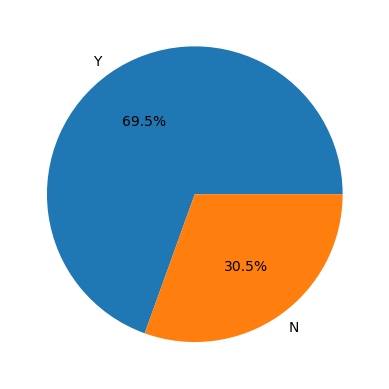

In [18]:
temp=df["Loan_Status"].value_counts()
plt.pie(temp.values,
       labels=temp.index,
       autopct='%1.1f%%')
plt.show()

In [19]:
#One of the main observations we can draw here is that the chances of getting a loan approved for married people are quite low compared to those who are not married.

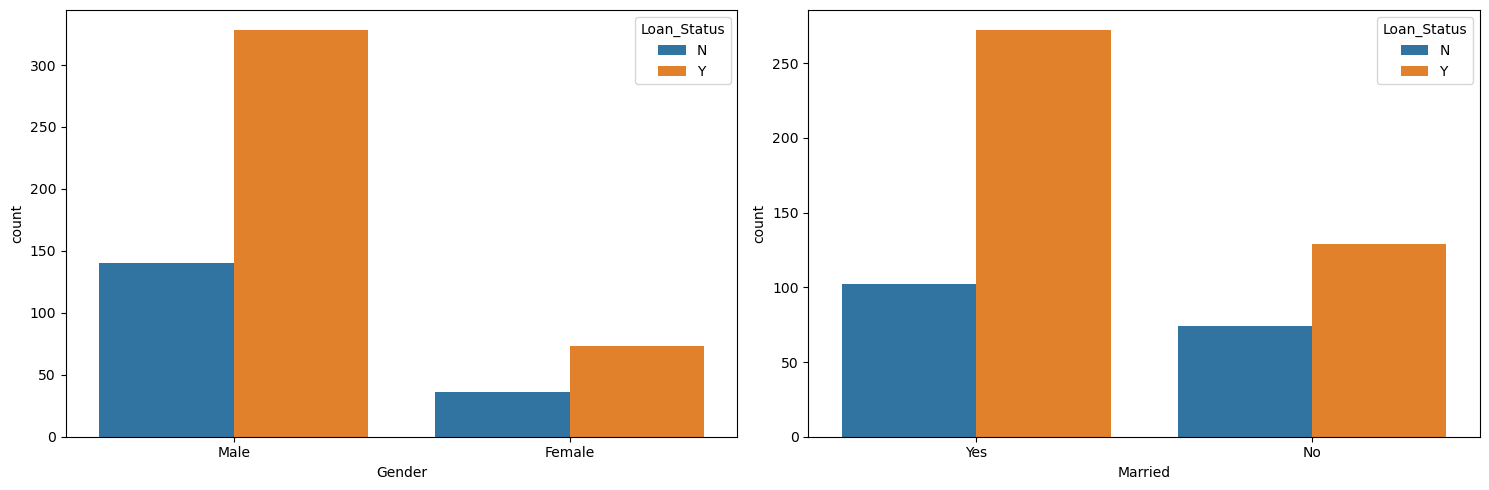

In [23]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.countplot(df[col], hue=df['Loan_Status'])
plt.tight_layout()
plt.show()

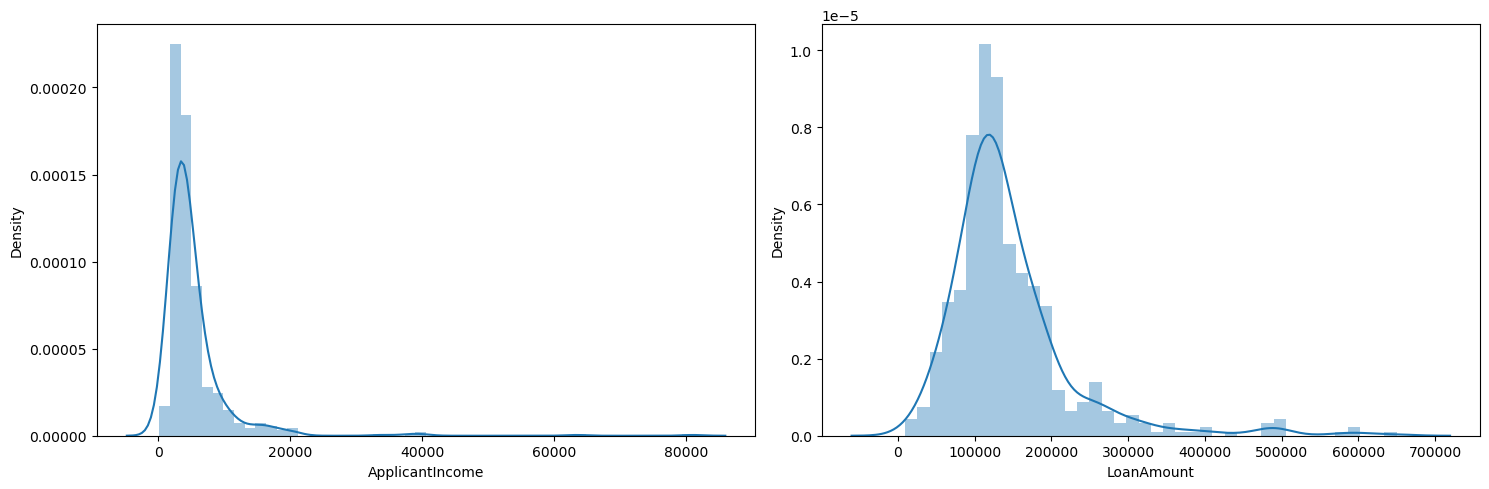

In [28]:
plt.subplots(figsize=(15,5))
for i,col in enumerate(["ApplicantIncome","LoanAmount"]):
    plt.subplot(1,2,i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [29]:
#To find out the outliers in the columns, we can use boxplot

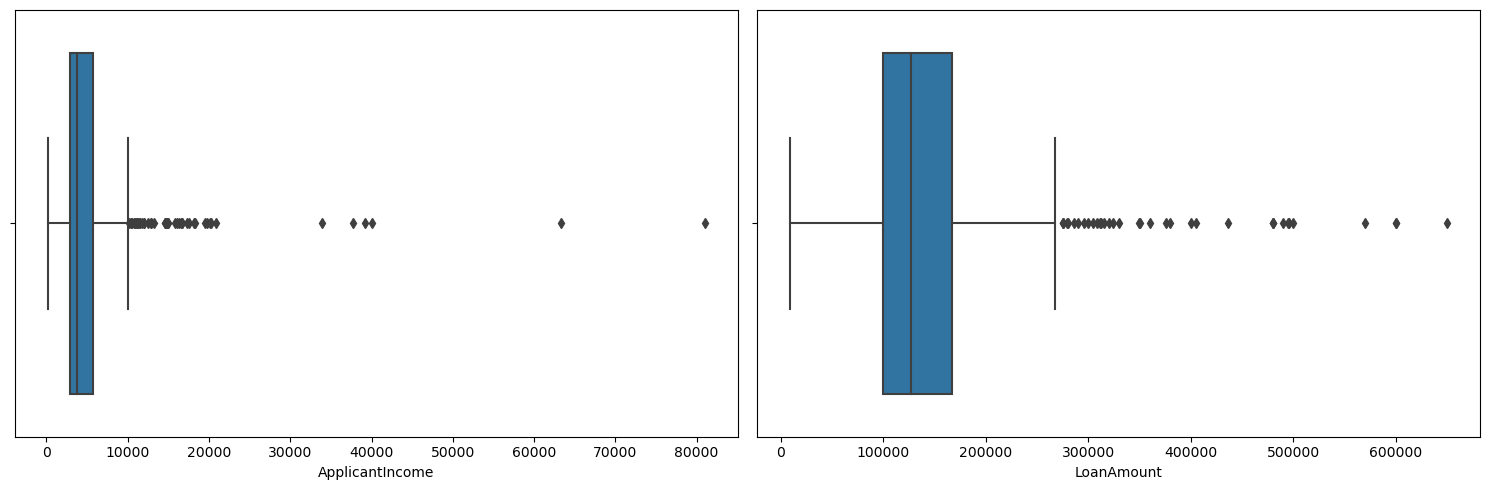

In [34]:
plt.subplots(figsize=(15,5))
for i,col in enumerate(["ApplicantIncome","LoanAmount"]):
    plt.subplot(1,2,i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [35]:
#There are some extreme outlier’s in the data we need to remove them.

In [37]:
df=df[df["ApplicantIncome"]<25000]
df=df[df["LoanAmount"]<400000]

In [38]:
#Let’s see the mean amount of the loan granted to males as well as females. For that, we will use groupyby() method.

In [40]:
df.groupby('Gender').mean()['LoanAmount']

Gender
Female    118822.429907
Male      139289.823009
Name: LoanAmount, dtype: float64

In [41]:
#The loan amount requested by males is higher than what is requested by females.

In [44]:
df.groupby(['Married', 'Gender']).mean()['LoanAmount']

Married  Gender
No       Female    116115.384615
         Male      126644.628099
Yes      Female    126103.448276
         Male      143912.386707
Name: LoanAmount, dtype: float64

In [45]:
#Here is one more interesting observation in addition to the previous one that the married people requested loan amount is generally higher than that of the unmarried. This may be one of the reason’s that we observe earlier that the chances of getting loan approval for a married person are lower than that compared to an unmarried person.

In [46]:
#function to apply label encoding

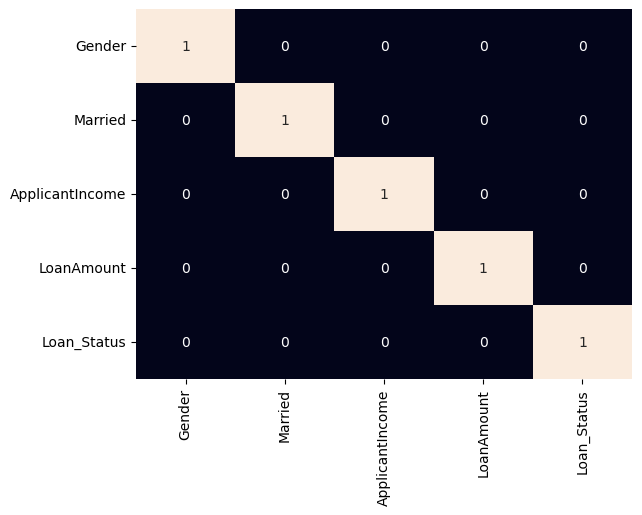

In [49]:
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype=="object":
            le=LabelEncoder()
            data[col]=le.fit_transform(data[col])
    return data

#Applying function in whole column
df=encode_labels(df)

#Generating Heatmap
sb.heatmap(df.corr()>0.8,annot=True,cbar=False)
plt.show()

In [50]:
#In this step, we will split the data for training and testing. After that, we will preprocess the training data.

In [54]:
features=df.drop("Loan_Status",axis=1)
target=df["Loan_Status"].values

X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,
                                              random_state=10)

# As the data was highly imbalanced we will balance
# it by adding repetitive rows of minority class

ros=RandomOverSampler(sampling_strategy="minority",
                     random_state=0)
X,Y = ros.fit_resample(X_train,Y_train)

X_train.shape,X.shape

((447, 4), (616, 4))

In [55]:
#We will now use Standard scaling for normalizing the data

In [59]:
scaler=StandardScaler()
x=scaler.fit_transform(X)
x_test=scaler.transform(X_test)

In [63]:
from sklearn.metrics import roc_auc_score
model = SVC(kernel='rbf')
model.fit(X, Y)
print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_test, model.predict(X_test)))
print()

Training Accuracy :  0.525974025974026
Validation Accuracy :  0.527479091995221



In [64]:
#Model Evaluation can be done using confusion matrix

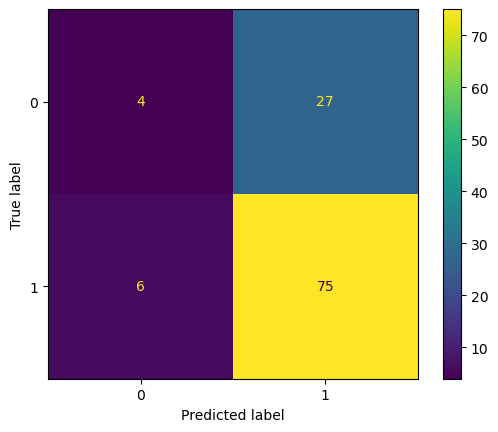

In [66]:
metrics.plot_confusion_matrix(model,X_test,Y_test)
plt.show()

In [69]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.40      0.13      0.20        31
           1       0.74      0.93      0.82        81

    accuracy                           0.71       112
   macro avg       0.57      0.53      0.51       112
weighted avg       0.64      0.71      0.65       112



In [ ]:
#Conclusion
#As this dataset contains fewer features the performance of the modelis not up to the mark maybe if we will use a better and big dataset we will be able to achieve better accuracy. 

